In [1]:
from tensorflow import keras
from keras.datasets import mnist

(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

print(x_test.shape)

# 60.000 dataset for training
# 10.000 dataset testing

11490434/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)


In [2]:
X_valid, X_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(X_train.shape)

(55000, 28, 28)


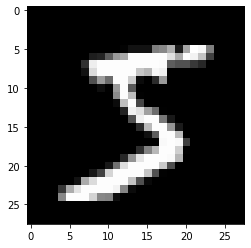

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_valid[0], cmap='gray')

In [4]:
X_train = X_train.reshape([X_train.shape[0], 28, 28, 1])
X_valid = X_valid.reshape([X_valid.shape[0], 28, 28, 1])
x_test = x_test.reshape([x_test.shape[0], 28, 28, 1])
print(X_train.shape)
print(X_valid.shape)
print(x_test.shape)

(55000, 28, 28, 1)
(5000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,1)))
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation ='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 27, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12096)             0         
                                                                 
 dense (Dense)               (None, 256)               3096832   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

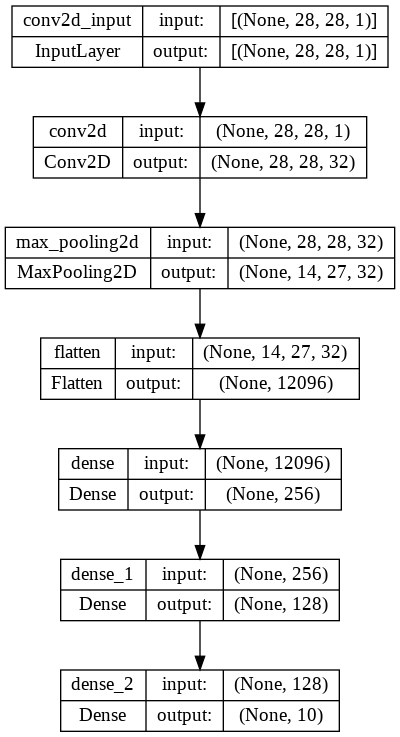

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 15s 4ms/step - loss: 0.4081 - accuracy: 0.8846 - val_loss: 0.1910 - val_accuracy: 0.9434
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1770 - accuracy: 0.9469 - val_loss: 0.1412 - val_accuracy: 0.9596
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1314 - accuracy: 0.9605 - val_loss: 0.1018 - val_accuracy: 0.9696
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1049 - accuracy: 0.9680 - val_loss: 0.0925 - val_accuracy: 0.9716
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.0796 - val_accuracy: 0.9742
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0742 - accuracy: 0.9772 - val_loss: 0.0741 - val_accuracy: 0.9764
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0640 - accuracy: 0.9801 - val_loss: 0.0650 - val_accuracy

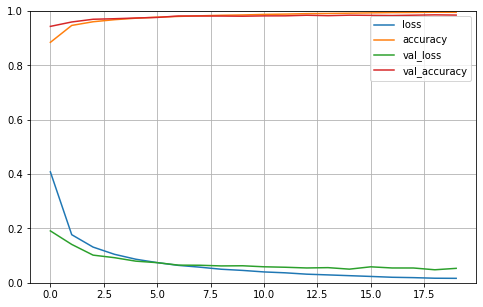

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 8.4619 - accuracy: 0.9851


In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis = 1)

cm = confusion_matrix(y_test, y_predict)
print(cm)


313/313 [==============================] - 1s 2ms/step
[[ 974    0    1    0    0    0    2    1    2    0]
 [   0 1126    2    1    0    0    3    1    2    0]
 [   5    1 1013    2    2    0    3    3    3    0]
 [   0    1    2 1000    0    1    0    1    2    3]
 [   0    0    2    0  966    0    4    1    1    8]
 [   3    0    0    8    1  869    7    1    0    3]
 [   5    3    0    1    2    2  944    0    1    0]
 [   2    2    2    1    0    0    0 1015    3    3]
 [   3    0    1    6    3    1    4    2  952    2]
 [   1    2    0    3    6    2    1    1    1  992]]
